## Pagrindiniai Pandas pavyzdžiai

Šiame užrašų knygelėje apžvelgsime keletą labai paprastų Pandas koncepcijų. Pradėsime nuo tipinių duomenų mokslo bibliotekų importavimo:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Serijos

Serijos yra panašios į sąrašą arba vienmatį masyvą, tačiau turi indeksą. Visos operacijos yra suderintos pagal indeksą.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Vienas iš dažniausių serijų naudojimo būdų yra **laiko serijos**. Laiko serijose indeksas turi ypatingą struktūrą – paprastai tai yra datų arba datų ir laikų diapazonas. Tokį indeksą galime sukurti naudodami `pd.date_range`.

Tarkime, turime seriją, kuri rodo, kiek produktų perkama kiekvieną dieną, ir žinome, kad kiekvieną sekmadienį taip pat turime pasiimti vieną prekę sau. Štai kaip tai modeliuoti naudojant serijas:


Length of index is 366


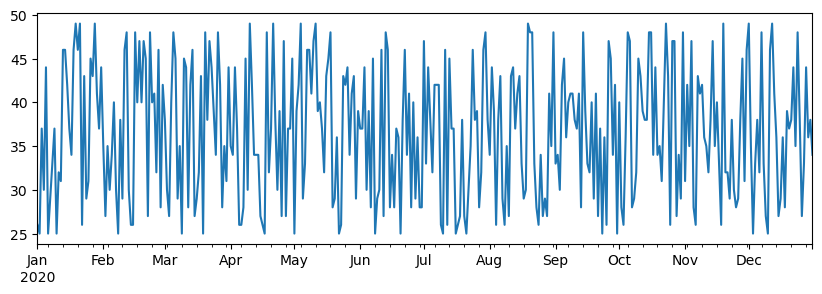

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Kaip matote, mes turime problemų, nes savaitinėje serijoje neminimos dienos laikomos trūkstamomis (`NaN`), o pridėjus `NaN` prie skaičiaus gauname `NaN`. Kad gautume teisingą rezultatą, turime nurodyti `fill_value` pridedant serijas:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


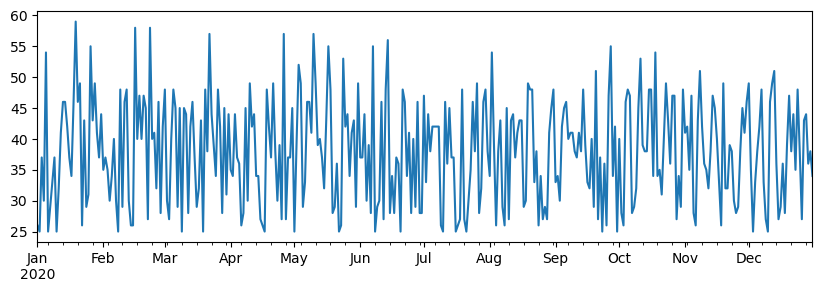

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

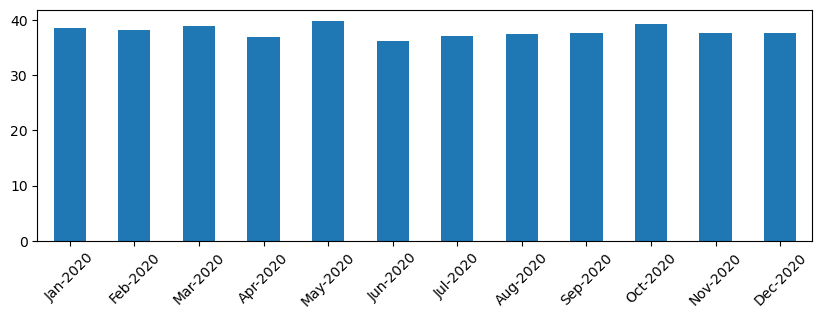

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## Duomenų rėmelis

Duomenų rėmelis iš esmės yra serijų rinkinys su tuo pačiu indeksu. Galime sujungti kelias serijas į vieną duomenų rėmelį. Turint `a` ir `b` serijas, apibrėžtas aukščiau:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Mes taip pat galime naudoti Series kaip stulpelius ir nurodyti stulpelių pavadinimus naudodami žodyną:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Tą patį rezultatą galima pasiekti transponuojant (ir tada pervadinant stulpelius, kad atitiktų ankstesnį pavyzdį):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**Stulpelių pasirinkimas** iš „DataFrame“ gali būti atliekamas taip:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Eilučių pasirinkimas** pagal filtravimo išraišką:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Taip tai veikia: išraiška `df['A']<5` grąžina loginę seriją, kuri nurodo, ar išraiška yra `True` ar `False` kiekvienam serijos elementui. Kai serija naudojama kaip indeksas, ji grąžina „DataFrame“ eilučių pogrupį. Todėl negalima naudoti bet kokios Python loginės išraiškos, pavyzdžiui, rašyti `df[df['A']>5 and df['A']<7]` būtų neteisinga. Vietoj to, turėtumėte naudoti specialią `&` operaciją loginėms serijoms:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**Kuriant naujas skaičiuojamas stulpelius**. Mes lengvai galime sukurti naujus skaičiuojamus stulpelius savo „DataFrame“ naudodami intuityvias išraiškas. Žemiau pateiktas kodas apskaičiuoja A nukrypimą nuo jo vidutinės vertės.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Kas iš tikrųjų vyksta, yra tai, kad mes skaičiuojame seką, o tada priskiriame šią seką kairiajai pusei, sukurdami kitą stulpelį.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**Eilučių pasirinkimas pagal skaičius** gali būti atliekamas naudojant `iloc` konstruktą. Pavyzdžiui, norint pasirinkti pirmas 5 eilutes iš „DataFrame“:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Grupavimas** dažnai naudojamas norint gauti rezultatą, panašų į *pivot lenteles* Excel programoje. Tarkime, kad norime apskaičiuoti stulpelio `A` vidutinę reikšmę kiekvienam `LenB` skaičiui. Tuomet galime grupuoti savo DataFrame pagal `LenB` ir iškviesti `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Jei mums reikia apskaičiuoti vidurkį ir elementų skaičių grupėje, tuomet galime naudoti sudėtingesnę `aggregate` funkciją:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Spausdinimas ir Vaizdavimas

Duomenų mokslininkai dažnai turi analizuoti duomenis, todėl svarbu mokėti juos vizualizuoti. Kai DataFrame yra didelis, dažnai norime tiesiog įsitikinti, kad viską darome teisingai, išspausdindami pirmas kelias eilutes. Tai galima padaryti iškviečiant `df.head()`. Jei tai vykdote iš Jupyter Notebook, jis išspausdins DataFrame gražioje lentelės formoje.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

Mes taip pat matėme, kaip naudoti `plot` funkciją tam tikrų stulpelių vizualizavimui. Nors `plot` yra labai naudinga daugeliui užduočių ir palaiko įvairius grafiko tipus per `kind=` parametrą, visada galite naudoti pagrindinę `matplotlib` biblioteką, jei norite sukurti sudėtingesnį grafiką. Duomenų vizualizaciją išsamiai aptarsime atskirose kurso pamokose.


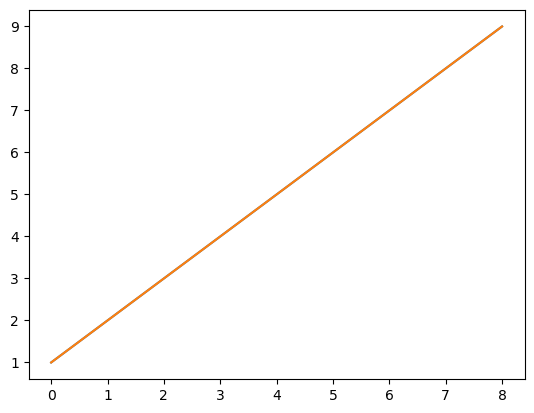

In [61]:
df['A'].plot()
plt.show()

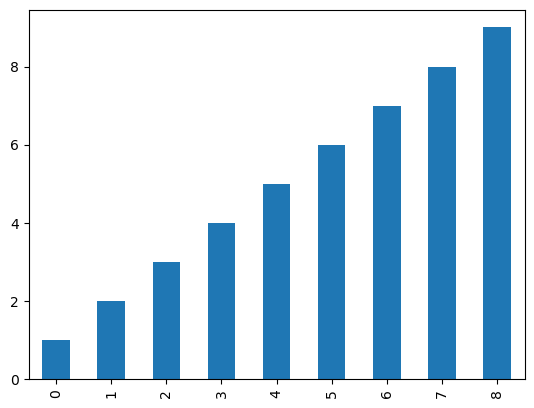

In [63]:
df['A'].plot(kind='bar')
plt.show()

Ši apžvalga apima svarbiausias Pandas koncepcijas, tačiau biblioteka yra labai turtinga, ir nėra ribų, ką galite su ja nuveikti! Dabar pritaikykime šias žinias konkrečios problemos sprendimui.



---

**Atsakomybės apribojimas**:  
Šis dokumentas buvo išverstas naudojant AI vertimo paslaugą [Co-op Translator](https://github.com/Azure/co-op-translator). Nors siekiame tikslumo, prašome atkreipti dėmesį, kad automatiniai vertimai gali turėti klaidų ar netikslumų. Originalus dokumentas jo gimtąja kalba turėtų būti laikomas autoritetingu šaltiniu. Kritinei informacijai rekomenduojama naudoti profesionalų žmogaus vertimą. Mes neprisiimame atsakomybės už nesusipratimus ar klaidingus interpretavimus, atsiradusius dėl šio vertimo naudojimo.
